In [0]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [0]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [0]:
cap = cv2.VideoCapture("mask_video.mp4")
num_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT ))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [0]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
writer = cv2.VideoWriter("predito.avi", fourcc, 60,(frame_width, frame_height), True)

In [0]:
labels_dict={0:'humano',1:'cabaço'}
color_dict={0:(0,255,0),1:(0,0,255)}

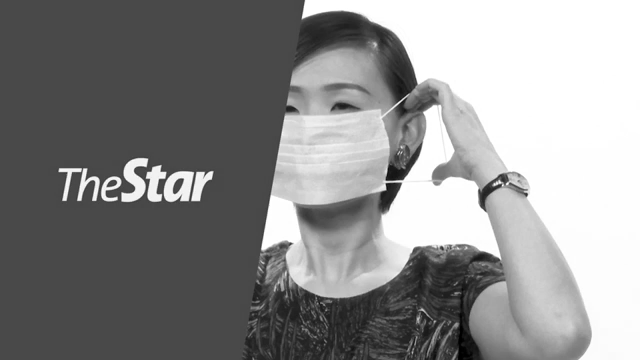

In [0]:
ret,img=cap.read()
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [0]:
while(True):

    ret,img=cap.read()

    if not ret:
      break

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))

        normalized=resized/255.0

        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
                
    writer.write(img)    

writer.release()
cap.release()